In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pyarrow



# Read the feather file
attrition_pop = pd.read_feather(r"D:\python Folder\attrition.feather")

# Display the first few rows
attrition_pop.head()




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [2]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state= 18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

In [3]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

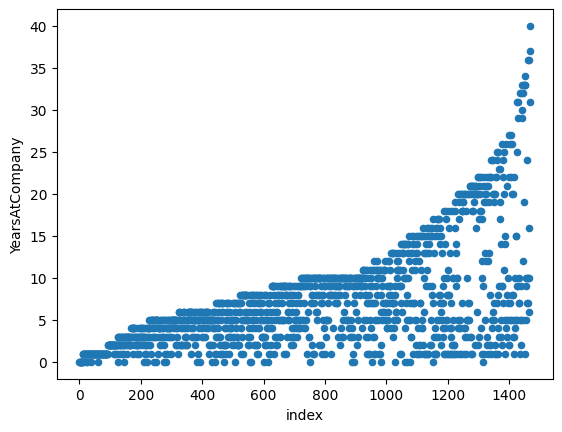

In [4]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

In [5]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


In [6]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      
         
# Print the sample
print(attrition_eq)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
774    33        0.0      Travel_Rarely        922  Research_Development   
869    45        0.0      Travel_Rarely       1015  Research_Development   
530    32        0.0      Travel_Rarely        120  Research_Development   
1049   48        0.0      Travel_Rarely        163                 Sales   
350    29        1.0      Travel_Rarely        408  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

C:\Users\melih\AppData\Local\Temp\ipykernel_37068\1743604168.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_eq = attrition_pop.groupby('Education')\


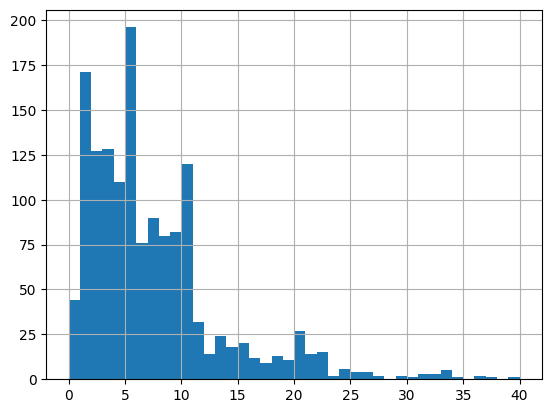

In [7]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

In [8]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
import random
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
attrition_filtered

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
30,19,1.0,Travel_Rarely,489,Human_Resources,2,College,Technical_Degree,Low,Male,...,Excellent,High,0,1,3,Best,1,0,0,0
77,24,1.0,Travel_Rarely,240,Human_Resources,22,Below_College,Human_Resources,Very_High,Male,...,Excellent,High,1,1,2,Better,1,0,0,0
81,29,0.0,Travel_Rarely,352,Human_Resources,6,Below_College,Medical,Very_High,Male,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
88,27,1.0,Travel_Frequently,1337,Human_Resources,22,Bachelor,Human_Resources,Low,Female,...,Excellent,Low,0,1,2,Better,1,0,0,0
116,34,1.0,Travel_Rarely,1107,Human_Resources,9,Master,Technical_Degree,Low,Female,...,Excellent,Very_High,0,2,0,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,56,0.0,Travel_Rarely,1400,Research_Development,7,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,37,3,Good,6,4,0,2
1464,55,0.0,Travel_Rarely,452,Research_Development,1,Bachelor,Medical,Very_High,Male,...,Excellent,High,0,37,2,Better,36,10,4,13
1465,55,0.0,Travel_Rarely,1117,Sales,18,Doctor,Life_Sciences,Low,Female,...,Outstanding,Very_High,0,37,2,Better,10,9,7,7
1466,58,0.0,Non-Travel,350,Sales,2,Bachelor,Medical,Medium,Male,...,Outstanding,Very_High,1,37,0,Good,16,9,14,14


In [9]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole")\
    .sample(n=10, random_state=2022)

# Print the sample
attrition_clust       

C:\Users\melih\AppData\Local\Temp\ipykernel_37068\2481614214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
C:\Users\melih\AppData\Local\Temp\ipykernel_37068\2481614214.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_filtered.groupby("JobRole")\


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1348,44,1.0,Travel_Rarely,1376,Human_Resources,1,College,Medical,Medium,Male,...,Excellent,Very_High,1,24,1,Better,20,6,3,6
886,41,0.0,Non-Travel,552,Human_Resources,4,Bachelor,Human_Resources,High,Male,...,Excellent,Medium,1,10,4,Better,3,2,1,2
983,39,0.0,Travel_Rarely,141,Human_Resources,3,Bachelor,Human_Resources,High,Female,...,Excellent,High,1,12,3,Bad,8,3,3,6
88,27,1.0,Travel_Frequently,1337,Human_Resources,22,Bachelor,Human_Resources,Low,Female,...,Excellent,Low,0,1,2,Better,1,0,0,0
189,34,0.0,Travel_Rarely,829,Human_Resources,3,College,Human_Resources,High,Male,...,Excellent,High,1,4,1,Bad,3,2,0,2
160,24,0.0,Travel_Frequently,897,Human_Resources,10,Bachelor,Medical,Low,Male,...,Excellent,Very_High,1,3,2,Better,2,2,2,1
839,46,0.0,Travel_Rarely,991,Human_Resources,1,College,Life_Sciences,Very_High,Female,...,Excellent,High,0,10,3,Best,7,6,5,7
966,30,0.0,Travel_Rarely,1240,Human_Resources,9,Bachelor,Human_Resources,High,Male,...,Excellent,Very_High,0,12,2,Bad,11,9,4,7
162,28,0.0,Non-Travel,280,Human_Resources,1,College,Life_Sciences,High,Male,...,Excellent,Medium,1,3,2,Better,3,2,2,2
1231,37,0.0,Travel_Rarely,1239,Human_Resources,8,College,Other,High,Male,...,Excellent,High,0,19,4,Good,10,0,4,7


In [10]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\
    .sample(n=len(attrition_pop) // 4, random_state=2022)

C:\Users\melih\AppData\Local\Temp\ipykernel_37068\1495670106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()
C:\Users\melih\AppData\Local\Temp\ipykernel_37068\1495670106.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\


ValueError: Cannot take a larger sample than population when 'replace=False'

In [15]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
mean_attritions[0:5]

[np.float64(0.15),
 np.float64(0.16666666666666666),
 np.float64(0.15),
 np.float64(0.11666666666666667),
 np.float64(0.16666666666666666)]

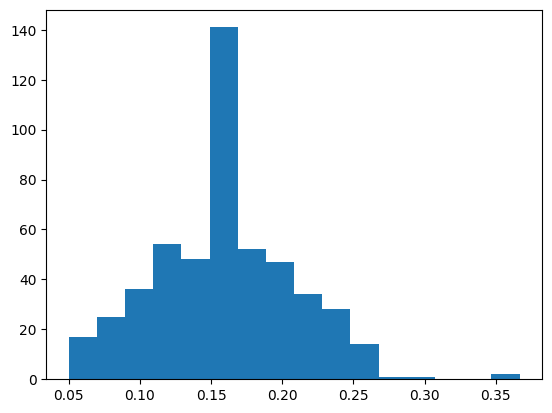

In [16]:

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)


plt.show()

In [23]:
import pandas as pd
from itertools import product

# Generate the Cartesian product
dice_combinations = list(product([1, 2, 3, 4, 5, 6], repeat=4))

# Turn into a DataFrame
dice = pd.DataFrame(dice_combinations, columns=['die1', 'die2', 'die3', 'die4'])

print(dice.head())  # Show the first few rows


   die1  die2  die3  die4
0     1     1     1     1
1     1     1     1     2
2     1     1     1     3
3     1     1     1     4
4     1     1     1     5


In [24]:
print(dice.tail())  # Show the last few rows

      die1  die2  die3  die4
1291     6     6     6     2
1292     6     6     6     3
1293     6     6     6     4
1294     6     6     6     5
1295     6     6     6     6


In [25]:
#Mean column ekle
dice['mean_roll']= ( dice['die1']+dice['die2']+dice['die3']+dice['die4'])/4
dice

,die1,die2,die3,die4,mean_roll
0,1,1,1,1,1.00
1,1,1,1,2,1.25
2,1,1,1,3,1.50
3,1,1,1,4,1.75
4,1,1,1,5,2.00
...,...,...,...,...,...
1291,6,6,6,2,5.00
1292,6,6,6,3,5.25
1293,6,6,6,4,5.50
1294,6,6,6,5,5.75


<Axes: xlabel='mean_roll'>

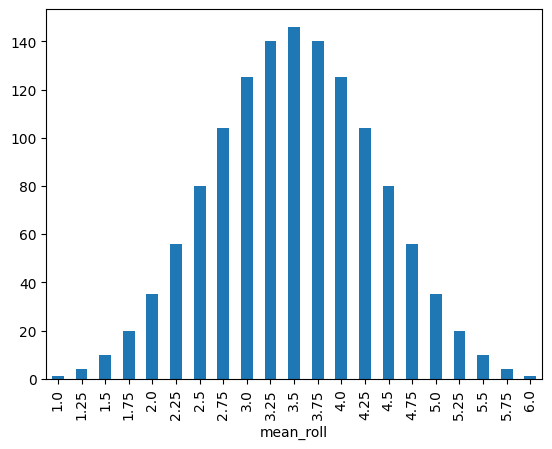

In [28]:

dice['mean_roll'] = dice['mean_roll'].astype('category')

dice['mean_roll'].value_counts(sort=False).plot(kind='bar')

In [29]:
import numpy as np
np.random.choice(list(range(1,7)), size=4, replace=True).mean()

np.float64(4.0)

In [30]:
sample_means_1000=[]
for i in range(1000):
    sample_means_1000.append(np.random.choice(list(range(1,7)), size=4, replace=True).mean())

In [35]:
sample_means_1000

[np.float64(3.25),
 np.float64(4.0),
 np.float64(3.5),
 np.float64(5.0),
 np.float64(4.25),
 np.float64(2.5),
 np.float64(3.75),
 np.float64(4.75),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.75),
 np.float64(3.25),
 np.float64(3.25),
 np.float64(2.25),
 np.float64(4.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(4.25),
 np.float64(2.0),
 np.float64(3.75),
 np.float64(4.0),
 np.float64(2.25),
 np.float64(3.5),
 np.float64(4.5),
 np.float64(2.75),
 np.float64(4.0),
 np.float64(2.75),
 np.float64(4.25),
 np.float64(3.5),
 np.float64(3.75),
 np.float64(3.25),
 np.float64(4.25),
 np.float64(2.25),
 np.float64(3.5),
 np.float64(4.75),
 np.float64(3.25),
 np.float64(3.25),
 np.float64(3.5),
 np.float64(4.25),
 np.float64(2.5),
 np.float64(3.75),
 np.float64(4.75),
 np.float64(3.75),
 np.float64(5.25),
 np.float64(3.5),
 np.float64(5.5),
 np.float64(2.5),
 np.float64(4.25),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(2.25),
 np.float64(3.75),
 np.float64(2.25),
 np.float64(4.5)

(array([  3.,  10.,  10.,  27.,  42.,  58.,  85.,  90., 104.,   0., 115.,
        121.,  93.,  84.,  72.,  36.,  22.,  15.,  10.,   3.]),
 array([1.25 , 1.475, 1.7  , 1.925, 2.15 , 2.375, 2.6  , 2.825, 3.05 ,
        3.275, 3.5  , 3.725, 3.95 , 4.175, 4.4  , 4.625, 4.85 , 5.075,
        5.3  , 5.525, 5.75 ]),
 <BarContainer object of 20 artists>)

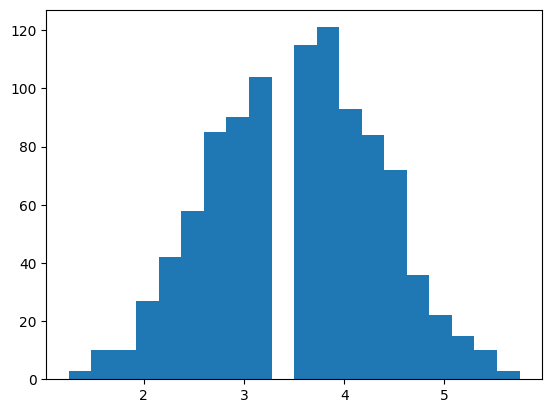

In [39]:
plt.hist(sample_means_1000, bins=20)